# MIT 6.036 Spring 2019: Homework 6

This homework does not include provided Python code. Instead, we encourage you to write your own code to help you answer some of these problems, and/or test and debug the code components we do ask for. All of the problems should be simple enough that hand calculation should be possible, but it may be convenient to write some short programs to explore the neural networks, particularly for ***problem 3.***


In [1]:
import numpy as np

def SM(z):
    # Compute the softmax of vector z
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z)

 **Problem 2A**

In [2]:
z = np.array([[-1, 0, 1]]).T
# Apply the softmax function
a = SM(z)

# Print the resulting probability distribution
print(a)


[[0.09003057]
 [0.24472847]
 [0.66524096]]


Problem 2B

In [3]:
import numpy as np

def nll(a, y):
    # Compute NLL directly without clipping
    return -np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))

# Given arrays
a = np.array([[0.3], [0.5], [0.2]])  # (3, 1)
y = np.array([[0], [0], [1]])        # (3, 1)

# Compute and print NLL
nll_value = nll(a, y)
print(nll_value)

# Print result with natural log value
print(f"NLL: {nll_value}")
print(f"-log(0.2) = {np.log(1 / 0.2)}")


2.6592600369327783
NLL: 2.6592600369327783
-log(0.2) = 1.6094379124341003


**Problem 3**

In [4]:
# layer 1 weights
w_1 = np.array([[1, 0, -1, 0], [0, 1, 0, -1]])
w_1_bias = np.array([[-1, -1, -1, -1]]).T
# layer 2 weights
w_2 = np.array([[1, -1], [1, -1], [1, -1], [1, -1]])
w_2_bias = np.array([[0, 2]]).T

# your code here

In [5]:
import numpy as np

# Define the input vector
x = np.array([3, 14])

# Define the weights for the first layer (including the bias)
W1 = np.array([[1, 0, -1, 0],
               [0, 1, 0, -1]])
bias1 = np.array([-1, -1, -1, -1])

# Compute the pre-activation (z1^1, z2^1, z3^1, z4^1)
z1 = np.dot(x, W1) + bias1

# Apply the ReLU activation function (f1(z) = max(z, 0))
a1 = np.maximum(z1, 0)

# Print the outputs of the hidden units
print(a1.tolist())


[2, 13, 0, 0]


**Computes the final output (a1^2,a2^2)of the network**

In [6]:
import numpy as np

# Layer 1 weights and biases
w_1 = np.array([[1, 0, -1, 0], [0, 1, 0, -1]])
w_1_bias = np.array([[-1, -1, -1, -1]]).T

# Layer 2 weights and biases
w_2 = np.array([[1, -1], [1, -1], [1, -1], [1, -1]])
w_2_bias = np.array([[0, 2]]).T

# Define the input vector
x = np.array([3, 14]).reshape(-1, 1)

# Compute the pre-activation (z1^1, z2^1, z3^1, z4^1) for layer 1
z1 = np.dot(w_1.T, x) + w_1_bias

# Apply the ReLU activation function (f1(z) = max(z, 0)) for layer 1
a1 = np.maximum(z1, 0)

# Compute the pre-activation for layer 2 (z1^2, z2^2)
z2 = np.dot(w_2.T, a1) + w_2_bias

# Compute the softmax activation for the output layer (a1^2, a2^2)
exp_z2 = np.exp(z2)
a2 = exp_z2 / np.sum(exp_z2)

# Print the final output of the network
final_output = a2.flatten().tolist()
print(final_output)


[0.9999999999993086, 6.914400106935422e-13]


**Plot the diagram for decision boundary**

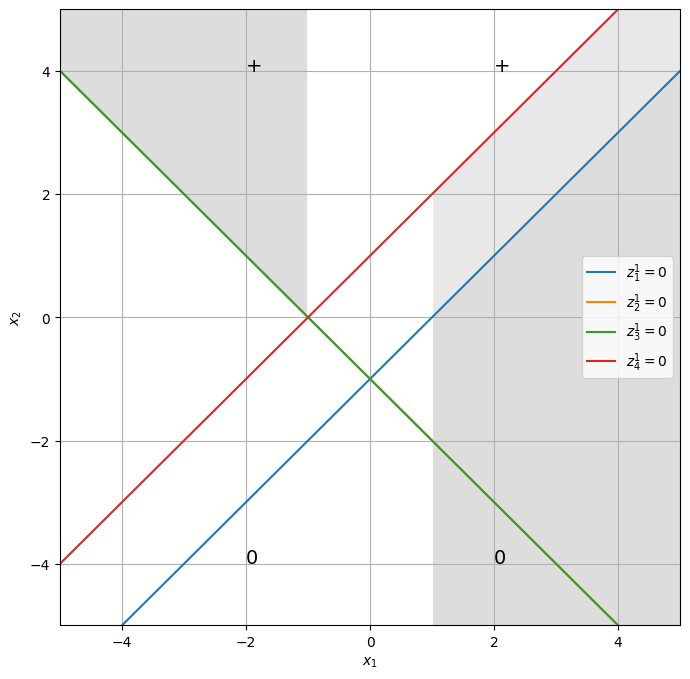

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the decision boundary equations
def decision_boundary_1(x1):
    return (1/1) * (x1 - 1)

def decision_boundary_2(x1):
    return -1 * (x1 + 1)

def decision_boundary_3(x1):
    return (-1/1) * (x1 + 1)

def decision_boundary_4(x1):
    return 1 * (x1 + 1)

# Generate values for x1
x1_vals = np.linspace(-5, 5, 400)

# Plot decision boundaries
plt.figure(figsize=(8, 8))

plt.plot(x1_vals, decision_boundary_1(x1_vals), label=r'$z_1^1 = 0$')
plt.plot(x1_vals, decision_boundary_2(x1_vals), label=r'$z_2^1 = 0$')
plt.plot(x1_vals, decision_boundary_3(x1_vals), label=r'$z_3^1 = 0$')
plt.plot(x1_vals, decision_boundary_4(x1_vals), label=r'$z_4^1 = 0$')

# Fill regions
plt.fill_between(x1_vals, decision_boundary_1(x1_vals), y2=-5, where=x1_vals >= 1, facecolor='lightgrey', alpha=0.5)
plt.fill_between(x1_vals, decision_boundary_2(x1_vals), y2=5, where=x1_vals <= -1, facecolor='lightgrey', alpha=0.5)
plt.fill_between(x1_vals, decision_boundary_3(x1_vals), y2=5, where=x1_vals <= -1, facecolor='lightgrey', alpha=0.5)
plt.fill_between(x1_vals, decision_boundary_4(x1_vals), y2=-5, where=x1_vals >= 1, facecolor='lightgrey', alpha=0.5)

# Add labels for the boundaries
plt.text(-2, -4, '0', fontsize=14, color='black')
plt.text(2, -4, '0', fontsize=14, color='black')
plt.text(-2, 4, '+', fontsize=14, color='black')
plt.text(2, 4, '+', fontsize=14, color='black')

# Set plot limits
plt.xlim([-5, 5])
plt.ylim([-5, 5])

# Label axes
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.show()


**Prints a 2x4 matrix where each column represents a different input vector [x1,x2]^T, each of which lies on the decision boundary for the first unit**

In [9]:
import numpy as np

# Define weights and bias for the first unit
w_1 = np.array([1])  # Only consider the non-zero weight
bias_1 = -1

def find_boundary_points():
    # Since x1 must be 1 to satisfy z1^1 = 0, we can choose different values of x2
    x2_values = [0, 2, -3, 4]

    # x1 is fixed at 1 for all boundary points
    x1_fixed = 1

    # Create the matrix where x1 is fixed, and x2 varies
    boundary_points = np.array([[x1_fixed] * 4, x2_values])

    # Print the resulting matrix
    print(boundary_points.tolist())

# Call the function
find_boundary_points()


[[1, 1, 1, 1], [0, 2, -3, 4]]


In [10]:
import numpy as np

T  = np.matrix([[0.0 , 0.1 , 0.9 , 0.0],
[0.9 , 0.1 , 0.0 , 0.0],
[0.0 , 0.0 , 0.1 , 0.9],
[0.9 , 0.0 , 0.0 , 0.1]])
g = 0.9
r = np.matrix([0, 1., 0., 2.]).reshape(4, 1)

print(np.linalg.solve(np.eye(4) - g * T, r))

[[6.05288295]
 [6.48663207]
 [6.7519581 ]
 [7.58553317]]


***Boundary checks for above code ***

In [11]:
import numpy as np

# Transition matrix T (4x4)
T = np.matrix([[0.0, 0.1, 0.9, 0.0],
               [0.9, 0.1, 0.0, 0.0],
               [0.0, 0.0, 0.1, 0.9],
               [0.9, 0.0, 0.0, 0.1]])

# Discount factor
g = 0.9

# Reward vector r (4x1)
r = np.matrix([0, 1., 0., 2.]).reshape(4, 1)

# Identity matrix I (4x4)
I = np.eye(4)

# Matrix to solve (I - g * T)
A = I - g * T

# Check if the matrix is invertible (optional)
if np.linalg.det(A) != 0:
    # Solve for the value function V
    V = np.linalg.solve(A, r)
    print("Value function V:\n", V)
else:
    print("Matrix (I - g * T) is singular and cannot be solved.")

# Additional: Print the transition matrix for verification
print("Transition matrix T:\n", T)
print("Matrix (I - g * T):\n", A)


Value function V:
 [[6.05288295]
 [6.48663207]
 [6.7519581 ]
 [7.58553317]]
Transition matrix T:
 [[0.  0.1 0.9 0. ]
 [0.9 0.1 0.  0. ]
 [0.  0.  0.1 0.9]
 [0.9 0.  0.  0.1]]
Matrix (I - g * T):
 [[ 1.   -0.09 -0.81  0.  ]
 [-0.81  0.91  0.    0.  ]
 [ 0.    0.    0.91 -0.81]
 [-0.81  0.    0.    0.91]]


**Code to print a matrix where each column represents the outputs of the hidden units (f(z1^1),…,f(z4^1)) for each of the input vectors**

In [12]:
import numpy as np

# Define the input vectors
x1 = np.array([0.5, 0.5])
x2 = np.array([0, 2])
x3 = np.array([-3, 0.5])

# Combine them into a matrix where each column is an input vector
X = np.column_stack([x1, x2, x3])

# Define the weights for the first layer (including the bias)
W1 = np.array([[1, 0, -1, 0],
               [0, 1, 0, -1]])
bias1 = np.array([-1, -1, -1, -1])

# Compute the pre-activation values z1^1, z2^1, z3^1, z4^1 for each input vector
Z = np.dot(W1.T, X) + bias1.reshape(-1, 1)

# Apply the ReLU activation function to get the hidden unit outputs
A = np.maximum(Z, 0)

# Print the matrix where each column represents the outputs of the hidden units
print(A)


[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]
 [0. 0. 0.]]


**Expressions**

In [13]:
import numpy as np

# Compute the softmax outputs
a1_2 = 1 / (1 + np.exp(2))
a2_2 = np.exp(2) / (1 + np.exp(2))

print(f"a1^2 = {a1_2}")
print(f"a2^2 = {a2_2}")


a1^2 = 0.11920292202211755
a2^2 = 0.8807970779778824
